In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


#  **Loading the Datasets** 

In [2]:
#reading the datasets
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv', encoding = "ISO-8859-1")
test= pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv', encoding = "ISO-8859-1")
movies = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

# **Importing required Libraries**

In [3]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

# **Exploratory Data Analysis**

In [4]:
movies.shape #fetching the no.of rows and columns of movies dataset 

(143258, 14)

**Movies** dataset has **14 columns** which includes the following:

**1.movieid** : id of the movie

**2.title** : title of the movie

**3.audienceScore** : score given by the audience for the movie

**4.rating** : rating for the movie 

**5.ratingContents** : describes the minimum maturity level of content in movie

**6.releaseDateTheaters** : date of the release of movies in theatre

**7.releaseDateStreaming** : date of the release of movies in streaming platform

**8.runtimeMinutes** : runtime of the movie in minutes

**9.genre** : genre of the movie

**10.originalLanguage** : the language in which the movie was originally made.

**11.director** : director of the movie

**12.distributor** : distributor of the movie

**13.soundType** : soundtype used in the movie

In [5]:
movies.head() #printing top 5 rows of movies dataset

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [6]:
train.shape #rows and columns of train dataset

(162758, 5)

Train has 5 columns which includes the following:

**1.movieid** : name of the movie

**2.reviewerName** : name of the reviewer

**3.isFrequentReviewer** : returns boolean values as to whether the reviewer is a frequent reviewer

**4.reviewText** : review given by the reviewer

**5.sentiment** : positive or negative based on the review given by the reviewer


In [7]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selickâs first movie since 2009âs Co...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [8]:
movies.drop_duplicates("movieid",inplace =True) #dropping duplicates from movies

In [9]:
# merging the datasets 
merged = pd.merge(train,movies,on='movieid',how='left')
merged2 = pd.merge(test,movies,on='movieid',how="left")


Text(0.5, 1.0, 'Sentiment distribution')

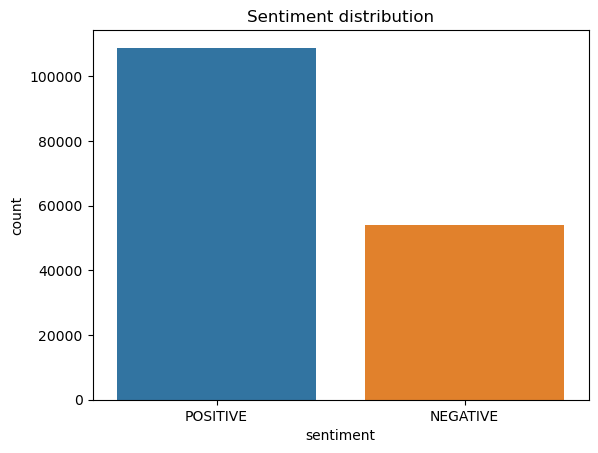

In [10]:
sns.countplot(x='sentiment', data=merged)
plt.title("Sentiment distribution")

In [11]:
#shifting the label column to the last position
merged = merged.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,4]]

In [12]:
merged.shape #fetching no.of rows and columns of merged dataset

(162758, 17)

In [13]:
merged.isnull().sum() #checking for Null values in merged dataset

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
sentiment                   0
dtype: int64

In [14]:
merged.info() #datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   title                 162758 non-null  object 
 5   audienceScore         149510 non-null  float64
 6   rating                99034 non-null   object 
 7   ratingContents        99034 non-null   object 
 8   releaseDateTheaters   126924 non-null  object 
 9   releaseDateStreaming  146573 non-null  object 
 10  runtimeMinutes        159382 non-null  float64
 11  genre                 160320 non-null  object 
 12  originalLanguage      159468 non-null  object 
 13  director              162758 non-null  object 
 14  boxOffice             109982 non-null  object 
 15  

In [15]:
merged2.isnull().sum() #checking for Null values in merged dataset

movieid                     0
reviewerName                0
isTopCritic                 0
reviewText               2510
title                       0
audienceScore            4931
rating                  24296
ratingContents          24296
releaseDateTheaters     13702
releaseDateStreaming     5974
runtimeMinutes           1262
genre                     920
originalLanguage         1238
director                    0
boxOffice               19995
distributor             15596
soundType               30626
dtype: int64

In [16]:
merged.describe()

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


# **Feature Selection**

In [17]:
# using simple imputer and ordinal encoder on merged to plot correlation matrix 



pipe = Pipeline([('impute',SimpleImputer(strategy = 'constant')),('encode',OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value=np.nan))])

encoded = pipe.fit_transform(merged.astype(str))
encode =pd.DataFrame(np.matrix(encoded))
encode.columns = merged.columns.values
encode


,movieid,reviewerName,isFrequentReviewer,reviewText,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,sentiment
0,10191.0,457.0,0.0,54766.0,10191.0,62.0,2.0,4333.0,4176.0,2824.0,6.0,268.0,18.0,723.0,3526.0,983.0,1.0
1,14323.0,1514.0,0.0,146614.0,14323.0,100.0,7.0,4477.0,4226.0,1025.0,207.0,0.0,18.0,200.0,3526.0,1610.0,0.0
2,1776.0,3150.0,1.0,38128.0,1776.0,79.0,2.0,1171.0,3838.0,1984.0,34.0,462.0,18.0,870.0,229.0,1525.0,1.0
3,9147.0,3675.0,0.0,57615.0,9147.0,100.0,7.0,4477.0,4226.0,2292.0,55.0,462.0,72.0,2782.0,3526.0,1610.0,1.0
4,8349.0,95.0,0.0,41389.0,8349.0,97.0,3.0,1507.0,2443.0,387.0,35.0,367.0,64.0,4523.0,2928.0,939.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,14040.0,1090.0,0.0,18205.0,14040.0,100.0,7.0,4477.0,4226.0,356.0,212.0,1022.0,18.0,3234.0,3526.0,1610.0,1.0
162754,2663.0,1918.0,1.0,101766.0,2663.0,13.0,2.0,372.0,3603.0,1343.0,3.0,259.0,18.0,8552.0,1434.0,1059.0,0.0
162755,7271.0,663.0,0.0,129962.0,7271.0,76.0,2.0,3239.0,4226.0,2758.0,206.0,282.0,18.0,1062.0,3526.0,1610.0,1.0
162756,3300.0,1479.0,0.0,114030.0,3300.0,33.0,7.0,4477.0,1860.0,52.0,203.0,868.0,18.0,5596.0,2659.0,4.0,0.0


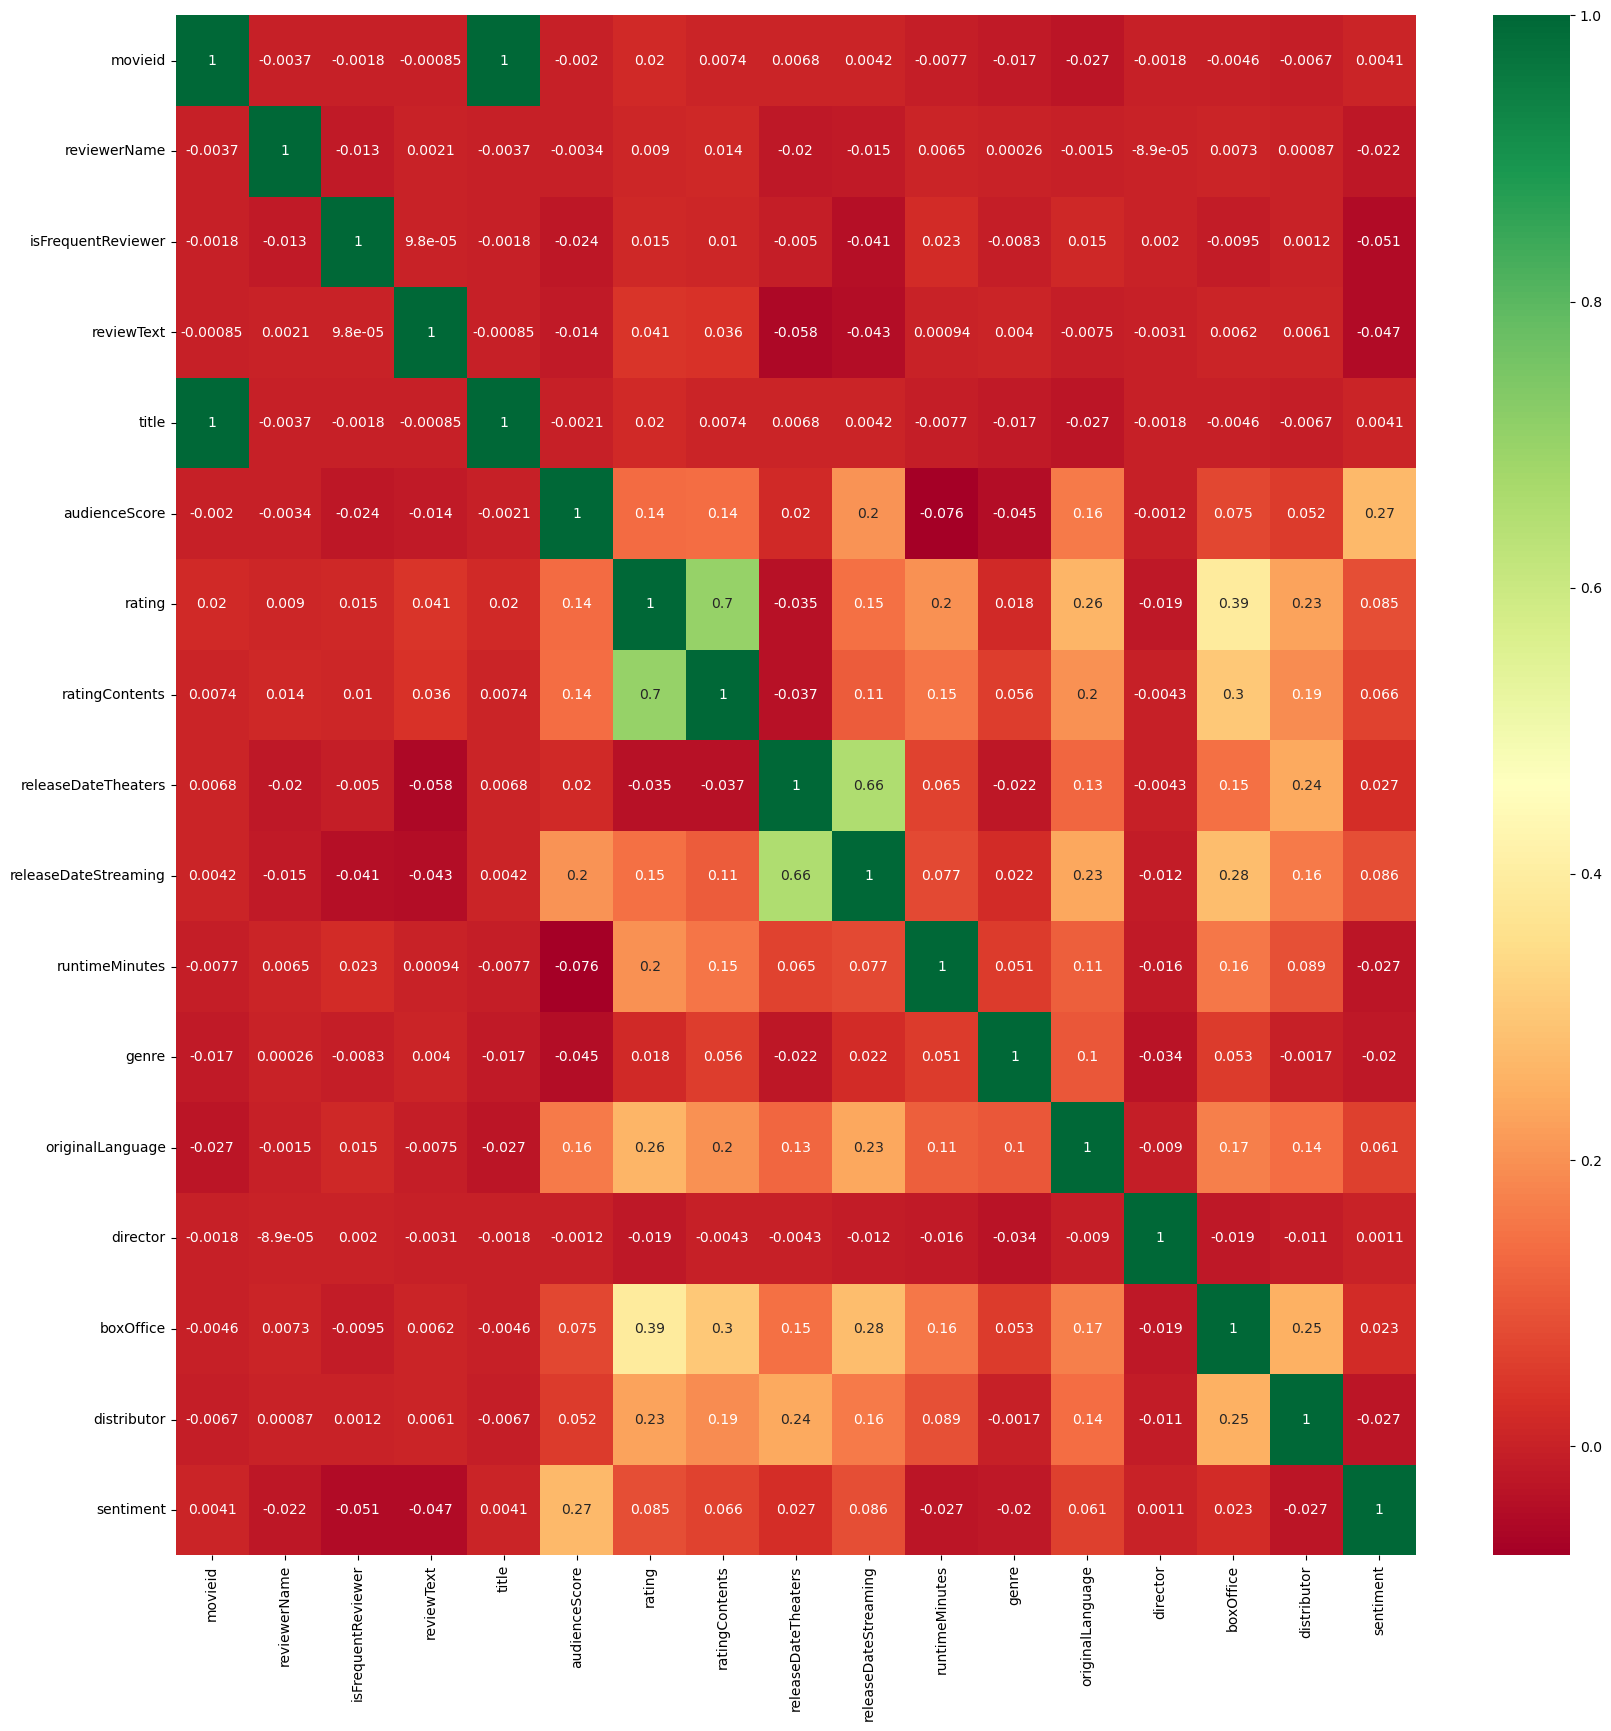

In [18]:
#plotting correlation matrix to extract best features
corrmat = encode.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(encode[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Preprocessing the feature columns for training the model**

In [19]:
def data_preprocess(data,train =True):
    
    #converting the letters in reviewText to lower case
    data['reviewText'] = data['reviewText'].str.lower()
    #removing </ from reviewText 
    data['reviewText'] = data['reviewText'].str.replace('</','',regex =True)
    #removing text with link address
    data['reviewText'] = data['reviewText'].str.replace('https\S+|www\S+|http\S+','',regex = True) 
    #removing extra characters 
    data['reviewText'] = data['reviewText'].str.replace('\\&\\#[0-9]{1,4}\\;', '', regex = True)
    data['reviewText'] = data['reviewText'].str.replace('\\&[a-z]{2,10}\\;', '', regex = True)
    data['reviewText'] = data['reviewText'].str.replace('^\\.+',' ',regex = True)
    #removing the words with alphabet occuring consecutively
    data['reviewText'] = data['reviewText'].str.replace('\\S*(\\S)\\1\\1\\S*\\s?','',regex =True)
    #converting releasedatestreaming to month,year,date format
    data['releaseDateStreaming'] = pd.to_datetime(data['releaseDateStreaming'])
    data['date_year'] = data['releaseDateStreaming'].dt.year
    data['date_month'] = data['releaseDateStreaming'].dt.month
    data['date_day'] = data['releaseDateStreaming'].dt.day
    

    if train:
        #removing reviewtext which is less than 2 of length
        data = data[data['reviewText'].str.len()> 2]

    return data




      

In [20]:
#running merged and merged2 through preprocess function
merged = data_preprocess(merged)
merged2 = data_preprocess(merged2,train=False)


# **Assigning x and y for splitting and training the model**


In [21]:
x1 = merged[['audienceScore','originalLanguage','date_year','date_month','date_day','rating']].astype(str)
x1 = pipe.fit_transform(x1)
x1 =pd.DataFrame(x1)
x1.reset_index(drop =True,inplace=True)
y = merged['sentiment']

In [22]:
# using tfidfvectorizer on reviewText

vect = TfidfVectorizer(max_features = 6200)
x2 = vect.fit_transform(merged['reviewText']).toarray()

x2 =pd.DataFrame(x2)
x2.reset_index(drop =True,inplace=True)



In [23]:
x = pd.concat([x1,x2],axis = 1)

In [24]:
col = [x for x in range(6206)]
x.columns = col

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [26]:
# Logistic Regression model

logreg = LogisticRegression(C =10,solver ='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
f1score= f1_score(y_pred,y_test,average='micro')
print("f1_score for Logistic Regression:",f1score)

f1_score for Logistic Regression: 0.8093669023321284


In [27]:
# # Random Forest is an ensemble learning method that combines multiple decision trees
# # to make predictions. It can capture complex relationships in the data and is known
# # for handling noisy data well.

# rfc = RandomForestClassifier()
# rfc.fit(x_train,y_train)
# rfc_pred = rfc.predict(x_test)
# f1score= f1_score(rfc_pred,y_test,average='micro')
# print("f1_score for RandomForest Classifier:",f1score)


f1_score for RandomForest Classifier: 0.7639399852842381

In [28]:
# Multinomial naive bayes model
# Multinomial Naive Bayes, are simple and efficient classifiers 
# that work well for text classification tasks, including sentiment analysis. 
# They are known for their fast training and inference times.

# mnb = MultinomialNB()
# mnb.fit(x_train,y_train)
# mnb_pred = mnb.predict(x_test)
# f1score = f1_score(mnb_pred,y_test,average='micro')
# print('f1_score for Multinomial naive bayes:',f1score)

# Linear svc model

# lin_svc = LinearSVC()
# lin_svc.fit(x_train,y_train)
# lin_pred = lin_svc.predict(x_test)
# f1score = f1_score(lin_pred,y_test,average='micro')
# print("f1_score for LinearSVC:",f1score)

f1_score for Multinomial naive bayes: 0.6959275728590166

f1_score for LinearSVC: 0.7652835983236828

In [29]:
# # for logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import f1_score
# from sklearn.metrics import classification_report

# logreg = LogisticRegression(max_iter = 100)
# param_grid = {
#     'C': [0.1, 1, 10, 100],      # Regularization strength
#     'solver': ['liblinear', 'saga']    # Optimization solver
# }

# from sklearn.model_selection import GridSearchCV
# grid_search_lr = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_micro',n_jobs = -1)
# grid_search_lr.fit(x_train,y_train)

# best_model_lr = grid_search_lr.best_estimator_
# print(best_model_lr)

In [30]:
# handling nan values in reviewText column of merged2
merged2.reviewText=np.where(merged2["reviewText"].astype(str) == "nan",
                        "normal",merged2.reviewText)

In [31]:
# assigning values for prediction
x4 = merged2[['audienceScore','originalLanguage','date_year','date_month','date_day','rating']].astype(str)
x4 = pipe.fit_transform(x4)
x4 =pd.DataFrame(x4)
x4.reset_index(drop =True,inplace=True)


In [32]:
x5 = vect.transform(merged2['reviewText']).toarray()
x5 =pd.DataFrame(x5)
x5.reset_index(drop =True,inplace=True)

In [33]:
test = pd.concat([x4,x5],axis = 1)

test.columns = col


# **predicting on test dataset**

In [34]:
prediction = logreg.predict(test)

# **Submission**

In [35]:
submission = pd.DataFrame(columns=['id','sentiment'])
submission['id']= [i for i in range(len(prediction))]
submission['sentiment']= prediction 
submission.to_csv('submission.csv', index = False)

In [36]:
# fetching no of rows and columns of submission file
submission.shape

(55315, 2)